In [1]:
# Import all the necessary packages

%matplotlib inline
# %matplotlib widget
import numpy as np
import nibabel as nib                                                     # Read / write access to some common neuroimaging file formats
import itk                                                                # Jupyter widgets to visualize images in 2D and 3D
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import os

In [3]:
# os.chdir(os.path.pra)
os.chdir(os.path.dirname(os.getcwd()))

In [4]:
os.getcwd()

'/Users/ariel/gcn_segmentation'

In [5]:
# local imports
from lib.datasets.gendostroke import load_nifti, get_files_patient_path
from config import ENDOSTROKE_DIR


In [6]:
patient_dir = os.path.join(ENDOSTROKE_DIR, "1245" )
patients_files = get_files_patient_path(patient_dir)

{'CTN': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-N_x5_mm_nativ_iDose_1__20160910200904.nii')], 'CTA': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-A_x0_8mm_x_iDose_6__20160910201226.nii')], 'CTP-MASK': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-P_mask_iDose_4__20160910200958_mask.nii')], 'CTP-TMAX': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-P_Tmax_iDose_4__20160910200958.nii')], 'CTP-CBF': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-P_CBF_iDose_4__20160910200958.nii')], 'CTP-CBV': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-P_CBV_iDose_4__20160910200958.nii')], 'CTP-RAW': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedCT-P_raw_iDose_4__20160910200958.nii')], 'LESSION': [PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedLesion_DWI_og_b1000_20160914131204_label1_20190806130721_6.nii'), PosixPath('/Volumes/GG2/endo/1245/radiomics/NormalizedLesion_DWI_og_b1000_20160914131204_label1_20190911

In [7]:
def read_image(path_to_image):
    image_data = load_nifti(path_to_image)
    # pre-processing:
    window_center = 30
    window_width = 60
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    # X = np.clip(X, img_min, img_max)
    image_data = image_data *(image_data>img_min)*(image_data<img_max)
    return image_data

In [8]:
image_data = read_image(patients_files['CTP-TMAX'][0])

In [9]:
height, width, depth = image_data.shape


# visualize data

Plotting Layer 122 Channel 0 of Image


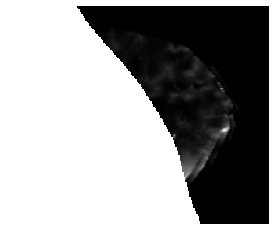

In [10]:
# Select random layer number
maxval = 154
i = np.random.randint(0, maxval)
# Define a channel to look at
channel = 0
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i], cmap='gray')
plt.axis('off');

In [11]:
# Define a function to visualize the data
def explore_3dimage(layer):
    fig, ax = plt.subplots()
    ax.imshow(image_data[:, :, layer], cmap='gray')
    ax.set_title('Explore Layers of Brain MRI', fontsize=20)
    ax.axis('off')
    plt.show()
    return layer
    
# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1))

interactive(children=(IntSlider(value=78, description='layer', max=157), Output()), _dom_classes=('widget-inte…

<function __main__.explore_3dimage(layer)>

In [12]:
lesion_data = [read_image(ff) for ff in patients_files['LESSION']]

In [13]:
lesion_names = {ff:i for i, ff in enumerate(patients_files["LESSION"])}

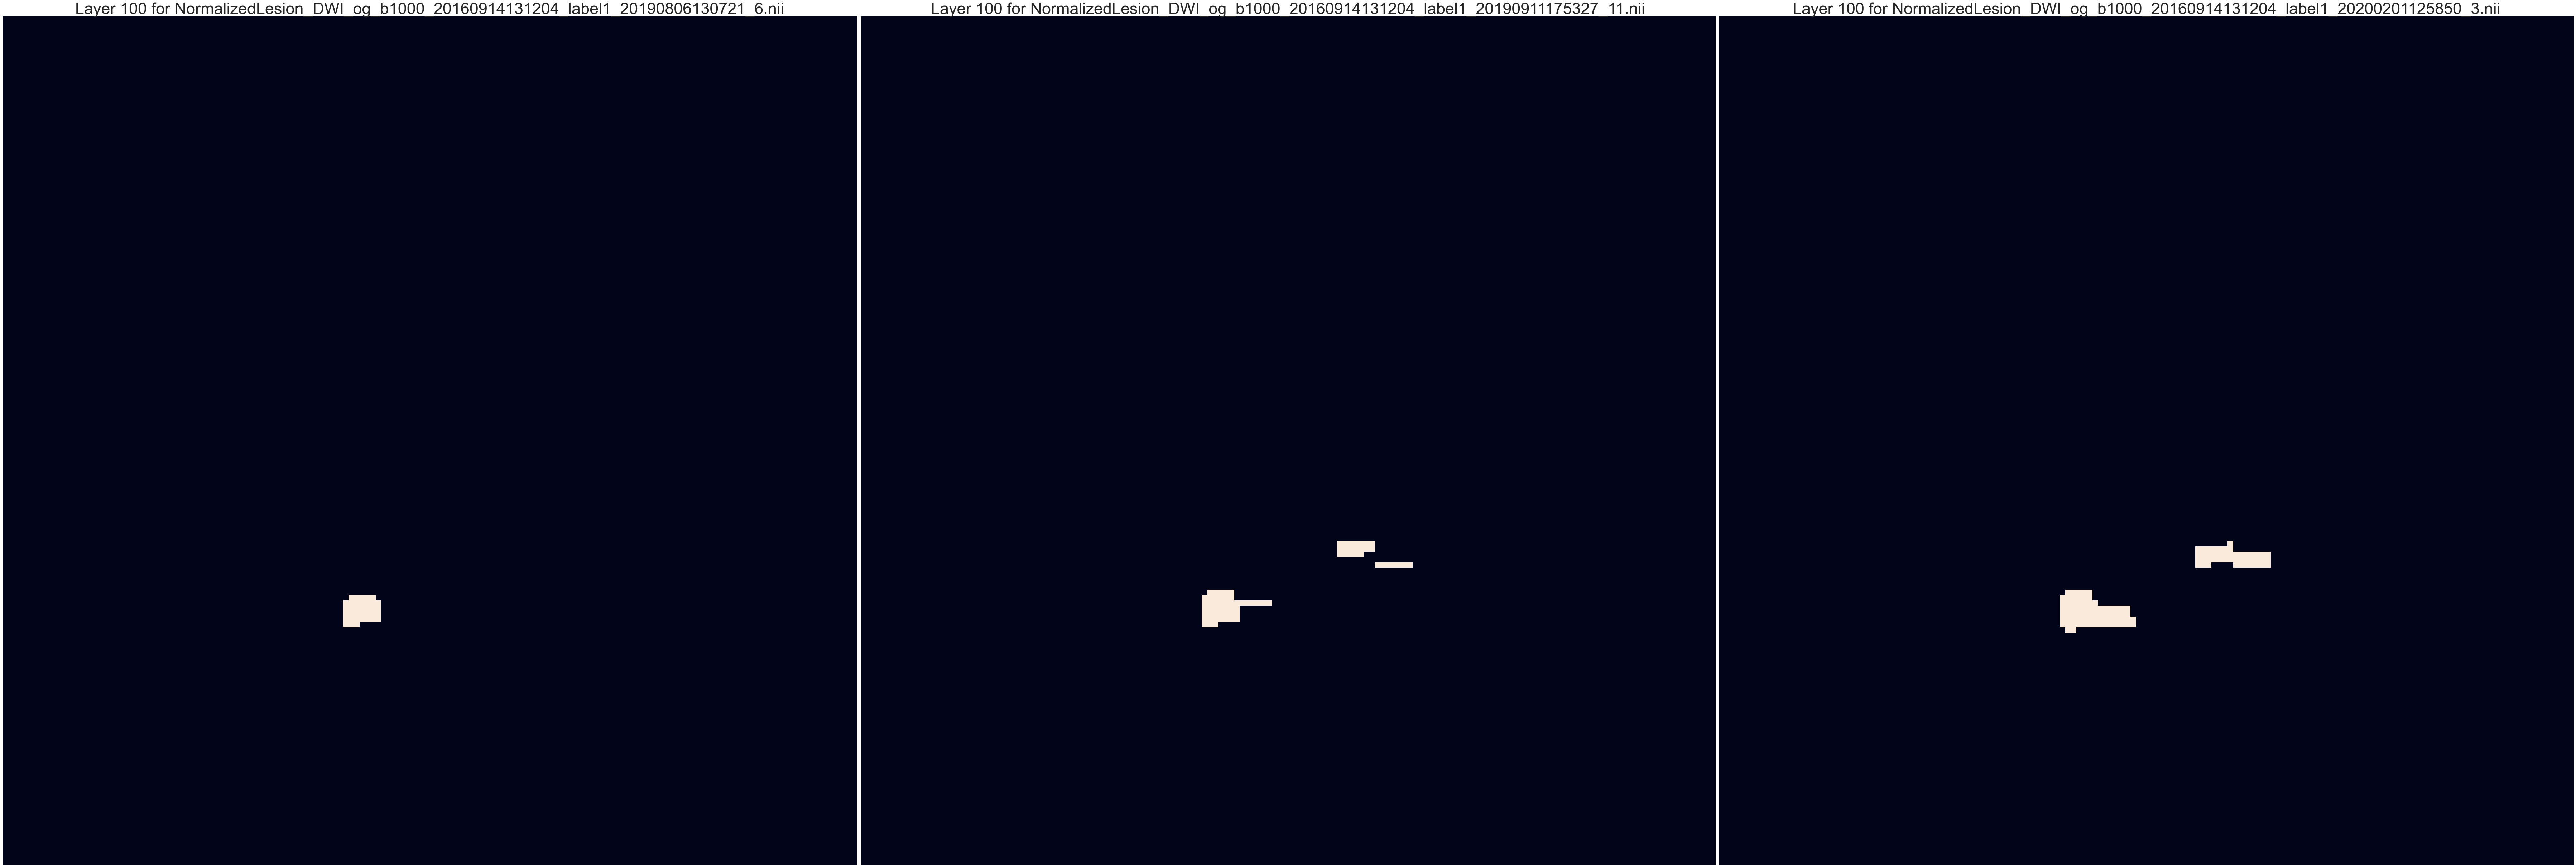

In [14]:
layer = 100
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(100, 100))
for i in range(3):
    img_label_str = list(lesion_names.keys())[i]
    mask = lesion_data[lesion_names[img_label_str]]
    # taking just the neameof of tifle
    
    img_label_str = os.path.basename(img_label_str)
    ax[i].imshow(mask[::,layer])
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [15]:
# Create button values
select_class = ToggleButtons(
    options=[os.path.basename(ff)[-21:-4] for ff in lesion_names.keys()],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)
# Create layer slider
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

    
# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    key_name = [ff for ff in lesion_names.keys() if seg_class in str(ff)][0]
    mask = lesion_data[lesion_names[key_name]][:,:,layer]
    fig, ax = plt.subplots()
    ax.imshow(mask, cmap='gray')
    ax.set_title('Explore Layers of Brain MRI', fontsize=20)
    ax.axis('off')
    plt.show()

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)


interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('_2019080613072…

## overlaping tasks

In [16]:
# Create button values
select_class = ToggleButtons(
    options=[os.path.basename(ff)[-21:-4] for ff in lesion_names.keys()],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)
# Create layer slider
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

    
# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    key_name = [ff for ff in lesion_names.keys() if seg_class in str(ff)][0]
    mask = lesion_data[lesion_names[key_name]][:,:,layer]
    fig, ax = plt.subplots()
    mask_rgb = np.zeros(mask.shape + (3,))
    mask_rgb[:,:,0] = mask
    ax.imshow(image_data[:,:,layer], cmap='gray')
    ax.imshow(mask, alpha=0.5)
    ax.set_title('Explore Layers of Brain MRI', fontsize=20)
    ax.axis('off')
    plt.show()

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('_2019080613072…

In [17]:
import numpy as np